<a href="https://colab.research.google.com/github/Sonu2252/Multi-Modal-For-Tweet-Sentiment/blob/main/multimodal_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
pip config list

global.disable-pip-version-check='True'
global.log='/var/log/pip.log'
list.format='columns'


In [ ]:
!pip install nltk

In [ ]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import re
import nltk
import json
import keras
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from keras.utils import plot_model

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer

In [ ]:
import warnings
# !pip install keras_preprocessing
import keras.utils as image
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, GlobalAveragePooling2D, Embedding, LSTM, multiply
from keras.models import Model
from keras import preprocessing, Input
from tensorflow import keras
from keras.models import Sequential
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from tensorflow.keras.models import load_model
import itertools
from PIL import Image, ImageFile
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D,MaxPooling1D,Conv1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Add, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam,SGD

In [ ]:

import zipfile

zip_file_path = '/content/drive/MyDrive/emotion_combined.zip'
extract_path = '/content/drive/MyDrive/emotion_combined_3'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
   zip_ref.extractall(extract_path)

In [ ]:
import glob
files = glob.glob("/content/drive/MyDrive/emotion_combined_3/emotion_combined/*.jpg")
len(files)

9119

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/abc.csv")
df.head()

,Unnamed: 0,tweet,intention,emojis,image_name
0,0,my life is meaningless i just want to end my l...,1,my life is meaningless i just want to end my l...,E8Q1DO2K7IAX.jpg
1,1,muttering i wanna die to myself daily for a fe...,1,muttering i wanna die to myself daily for a fe...,WRHKXTAJXV5W.jpg
2,2,work slave i really feel like my only purpose ...,1,work slave i really feel like my only purpose ...,C5GLD6AZNARU.jpg
3,3,i did something on the 2 of october i overdose...,1,i did something on the 2 of october i overdose...,IOBN5C8LFCF7.jpg
4,4,i feel like no one cares i just want to die ma...,1,i feel like no one cares i just want to die ma...,BBR1WOFEXYUD.jpg


In [ ]:
df['intention'].value_counts()

0    5121
1    3998
Name: intention, dtype: int64

In [ ]:

df['image_name'].shape

(9119,)

In [ ]:
df.isna().sum()

Unnamed: 0    0
tweet         0
intention     0
emojis        0
image_name    0
dtype: int64

In [ ]:
import random

(256, 256, 3)


<Figure size 640x480 with 0 Axes>

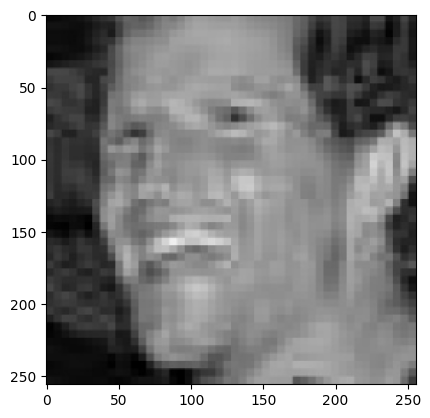

<Figure size 640x480 with 0 Axes>

In [ ]:
folder_path_image = "/content/drive/MyDrive/emotion_combined_3/emotion_combined/"
image_1 = plt.imread(folder_path_image + df["image_name"][random.randint(0, 9119)])
plt.imshow(image_1)
print(image_1.shape)
plt.figure()

In [ ]:
df["intention"][1982]

1

In [ ]:

df.shape

(9119, 5)

In [ ]:
def create_img_array(img_dirct):
  imgs = []
  for root, j, files in os.walk(img_dirct):
    for file in files:
      file = root + '' + file
      imgs.append(file)
  return imgs

In [ ]:
def create_img_path(df, col_name, img_dir):
  img_path = [img_dir + '' + name for name in df[col_name]]
  return img_path

img_path = create_img_path(df,'image_name', folder_path_image)

In [ ]:
len(img_path)

9119

In [ ]:
def get_input(path):
  img = image.load_img(path)
  return img

In [ ]:
def process_input(img):
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)
  return img_data

In [ ]:
images_all = []
for n, i in enumerate(img_path):
  input_img = get_input(i)
  process_img = process_input(input_img)
  images_all.append(process_img[0])

In [ ]:
image_train = []
image_test = []
for i in range(7300):
  image_train.append(images_all[i])
for j in range(len(images_all)-7300):
  image_test.append(images_all[j])

print(len(images_all))
print(len(image_train))
print(len(image_test))

9119
7300
1819


In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer
nltk.download('stopwords')
def text_cleaning(text):
  text = text.lower()
  return text
df['cleaned_text'] = df['emojis'].apply(text_cleaning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def print_metrices(true, pred):
   print("Precision: ", precision_score(true, pred, average='weighted'))
   print("Recall: ", recall_score(true, pred, average='weighted'))
   print("F1: ", f1_score(true, pred,  average='weighted'))

In [ ]:
df_1 = df.drop('intention', axis=1)
y = df['intention']
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
9114    1
9115    1
9116    1
9117    1
9118    1
Name: intention, Length: 9119, dtype: int64


In [ ]:
df_train = df_1['cleaned_text'][:7300]
df_test = df_1['cleaned_text'][7300:]
y_train = y[:7300]
y_test = y[7300:]

In [ ]:
df_train[0]

'my life is meaningless i just want to end my life so badly my life is completely empty and i dont want to have to create meaning in it creating meaning is pain how long will i hold back the urge to run my car head first into the next person coming the opposite way when will i stop feeling jealous of tragic characters like gomer pile for the swift end they were able to bring to their lives:('

In [ ]:
print(df_train.shape)
print(df_test.shape)

(7300,)
(1819,)


In [ ]:
max_len = 200
def text_tokenizer(train_data, test_data, vocabulary, max_len, sample_text_num):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(df['cleaned_text'])
  word_index = tokenizer.word_index
  vocab_size = len(word_index) + 1
  train_sequences = tokenizer.texts_to_sequences(train_data)
  train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
  test_sequences = tokenizer.texts_to_sequences(test_data)
  test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
  return train_pad_sequences, test_pad_sequences, vocab_size

vocabulary = 60000
sample_text_num=10

In [ ]:
train_pad_sequences, test_pad_sequences, vocab_size =  text_tokenizer(df_train,df_test,
                                                                      vocabulary,max_len,sample_text_num)


In [ ]:
print(vocab_size)
print(train_pad_sequences.shape)
print(test_pad_sequences.shape)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

24733
(7300, 200)
(1819, 200)


In [ ]:
y_train

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
keras.backend.clear_session()
def callbacks_check(model_name):
  num_classes = 6
  accuracy_threshold = 0.99

  class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>accuracy_threshold):
          print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
          self.model.stop_training = True

  acc_callback = myCallback()
  # Saved the Best Model
  filepath = folder_path+'Models/'+f"{model_name}.h5"
  checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
  callback_list = [acc_callback, checkpoint]

  return callback_list

In [ ]:
train_image = np.array(image_train)

In [ ]:
test_image = np.array(image_test)

In [ ]:
train_image.shape

(7300, 256, 256, 3)

In [ ]:
train_pad_sequences.shape

(7300, 200)

In [ ]:
y_train.shape

(7300, 1)

# LSTM+RESNET

In [ ]:
def create_lstm_resnet_model():
  keras.backend.clear_session()
  # create the base pre-trained model
  resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(256, 256, 3))
 # for layer in resnet.layers[0:-10]:
 #     layer.trainable = False
  # add a global spatial average pooling layer
  x = resnet.output
#  pool = GlobalAveragePooling2D()(x)
  # let's add a fully-connected layer
  flat = Flatten()(x)
  # and a logistic layer -- let's say we have 200 classes
  hidden2 = Dense(200, activation='relu')(flat)
  # this is the model we will train
  resnet_img_model = Model(inputs=resnet.input, outputs=hidden2)


  # Text Model

  bi_text_inputs = Input(shape=(200,))
  bi_embedding_layer = Embedding(vocab_size,300, trainable=False)(bi_text_inputs)
  LSTM_Layer_1 = Bidirectional(LSTM(30))(bi_embedding_layer)
 # LSTM_Layer_2 = Bidirectional(LSTM(30))(LSTM_Layer_1)

  bi_dense_layer_1 = Dense(200, activation='relu')(LSTM_Layer_1)
  bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)


   # Concatenating the output of 2 classifiers
  con_layer = keras.layers.concatenate([resnet_img_model.output, bilstm_model.output])
  dropout = Dropout(0.2)(con_layer)
  out = Dense(1,activation='sigmoid')(dropout)

  #Defining model input and output
  com_model = Model(inputs = [resnet_img_model.input, bilstm_model.input], outputs=out)


      # Concatenating the output of 2 classifiers
  con_layer = keras.layers.concatenate([resnet_img_model.output, bilstm_model.output])
  dropout = Dropout(0.2)(con_layer)
  final_dense = Dense(64, activation="relu")(dropout)
  out = Dense(1,activation='sigmoid')(final_dense)

  #Defining model input and output
  com_model = Model(inputs = [resnet_img_model.input, bilstm_model.input], outputs=out)

  return com_model

In [ ]:
filepath = '/content/drive/MyDrive/Graphs/Weights/'+ 'Models_resnet_1/'+ 'resnet_lstm_att.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2,
                                             save_weights_only=True, mode='max' )

In [ ]:

model_1 = create_lstm_resnet_model()

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model_1.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
history_1 = model_1.fit([train_image, train_pad_sequences],
          y_train, batch_size=8, epochs=10, validation_split=0.1, callbacks=[checkpoint])

Epoch 1/10
822/822 [==============================] - ETA: 0s - loss: 0.3441 - accuracy: 0.9132
Epoch 1: saving model to /content/drive/MyDrive/Graphs/Weights/Models_resnet_1/resnet_lstm_att.h5
822/822 [==============================] - 95s 67ms/step - loss: 0.3441 - accuracy: 0.9132 - val_loss: 0.5223 - val_accuracy: 0.8274
Epoch 2/10
822/822 [==============================] - ETA: 0s - loss: 0.1692 - accuracy: 0.9449
Epoch 2: saving model to /content/drive/MyDrive/Graphs/Weights/Models_resnet_1/resnet_lstm_att.h5
822/822 [==============================] - 51s 63ms/step - loss: 0.1692 - accuracy: 0.9449 - val_loss: 0.6049 - val_accuracy: 0.8151
Epoch 3/10
822/822 [==============================] - ETA: 0s - loss: 0.1272 - accuracy: 0.9607
Epoch 3: saving model to /content/drive/MyDrive/Graphs/Weights/Models_resnet_1/resnet_lstm_att.h5
822/822 [==============================] - 51s 62ms/step - loss: 0.1272 - accuracy: 0.9607 - val_loss: 0.6296 - val_accuracy: 0.8205
Epoch 4/10
822/822 

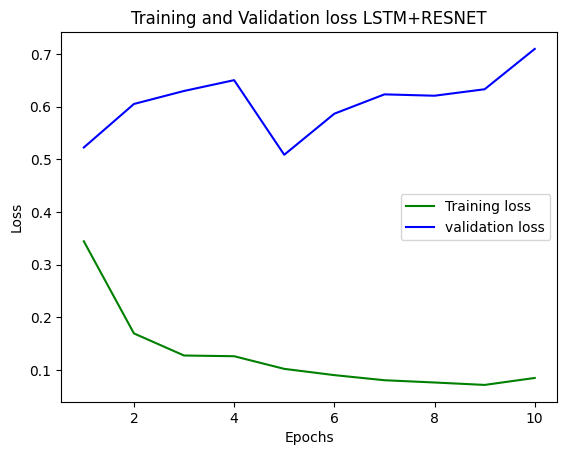

In [ ]:
loss_train = history_1.history['loss']
loss_val = history_1.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss LSTM+RESNET')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("/content/drive/MyDrive/Graphs/Plots/"+"train_val_loss_resnet.png")
plt.show()

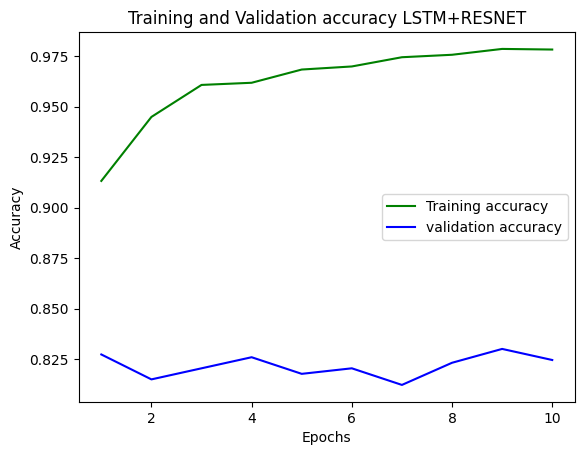

In [ ]:
acc_train = history_1.history['accuracy']
acc_val = history_1.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy LSTM+RESNET')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("/content/drive/MyDrive/Graphs/Plots/"+"train_val_accuracy_resnet.png")
plt.show()

In [ ]:
folder_path = '/content/drive/MyDrive/Graphs/Weights/'

In [ ]:
model_1.load_weights(folder_path+'Models_resnet_1/'+'resnet_lstm_att.h5')
y_pred = np.argmax(model_1.predict([test_image,test_pad_sequences]), axis=-1)
print_metrices(y_test, y_pred)

57/57 [==============================] - 6s 106ms/step
Precision:  0.667378514193077
Recall:  0.816932380428807
F1:  0.7346211905096564


#LSTM + Inception

In [ ]:
def create_lstm_inception_model():
  keras.backend.clear_session()
  # create the base pre-trained model
  inception = keras.applications.InceptionV3(weights='imagenet', include_top=False,input_shape=(256, 256, 3))
# for layer in inception.layers[0:-10]:
#     layer.trainable = False
  # add a global spatial average pooling layer
  x = inception.output
 # pool = GlobalAveragePooling2D()(x)
  # this is the model we will train
  flat = Flatten()(x)
  # and a logistic layer -- let's say we have 200 classes
  hidden2 = Dense(200, activation='relu')(flat)
  # this is the model we will train
  inception_img_model = Model(inputs=inception.input, outputs=hidden2)

   # Text Model

  bi_text_inputs = Input(shape=(200,))
  bi_embedding_layer = Embedding(vocab_size,300, trainable=False)(bi_text_inputs)
  LSTM_Layer_1 = Bidirectional(LSTM(30))(bi_embedding_layer)
 # LSTM_Layer_2 = Bidirectional(LSTM(30))(LSTM_Layer_1)

  bi_dense_layer_1 = Dense(200, activation='relu')(LSTM_Layer_1)
  bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)


   # Concatenating the output of 2 classifiers
  con_layer = keras.layers.concatenate([inception_img_model.output, bilstm_model.output])
  dropout = Dropout(0.2)(con_layer)
  out = Dense(1,activation='sigmoid')(dropout)

  #Defining model input and output
  com_model = Model(inputs = [inception_img_model.input, bilstm_model.input], outputs=out)


      # Concatenating the output of 2 classifiers
  con_layer = keras.layers.concatenate([inception_img_model.output, bilstm_model.output])
  dropout = Dropout(0.2)(con_layer)
  final_dense = Dense(64, activation="relu")(dropout)
  out = Dense(1,activation='sigmoid')(final_dense)

  #Defining model input and output
  com_model = Model(inputs = [inception_img_model.input, bilstm_model.input], outputs=out)

  return com_model




In [ ]:
filepath = '/content/drive/MyDrive/Graphs/Weights/'+ 'Models_incpetion_1/'+ 'inception_lstm_att.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2,
                                             save_weights_only=True, mode='max' )

In [ ]:
model_2 = create_lstm_inception_model()
model_2.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)   

In [ ]:
model_2.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=["accuracy"])

In [ ]:
history_2 = model_2.fit([train_image, train_pad_sequences],
          y_train, batch_size=8, epochs=10, validation_split=0.1, callbacks=[checkpoint])

Epoch 1/10
822/822 [==============================] - ETA: 0s - loss: 0.2873 - accuracy: 0.9065
Epoch 1: saving model to /content/drive/MyDrive/Graphs/Weights/Models_incpetion_1/inception_lstm_att.h5
822/822 [==============================] - 97s 71ms/step - loss: 0.2873 - accuracy: 0.9065 - val_loss: 3.0343 - val_accuracy: 0.7630
Epoch 2/10
822/822 [==============================] - ETA: 0s - loss: 0.1586 - accuracy: 0.9479
Epoch 2: saving model to /content/drive/MyDrive/Graphs/Weights/Models_incpetion_1/inception_lstm_att.h5
822/822 [==============================] - 54s 65ms/step - loss: 0.1586 - accuracy: 0.9479 - val_loss: 0.5394 - val_accuracy: 0.8233
Epoch 3/10
822/822 [==============================] - ETA: 0s - loss: 0.1247 - accuracy: 0.9609
Epoch 3: saving model to /content/drive/MyDrive/Graphs/Weights/Models_incpetion_1/inception_lstm_att.h5
822/822 [==============================] - 53s 65ms/step - loss: 0.1247 - accuracy: 0.9609 - val_loss: 0.6717 - val_accuracy: 0.8233
E

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


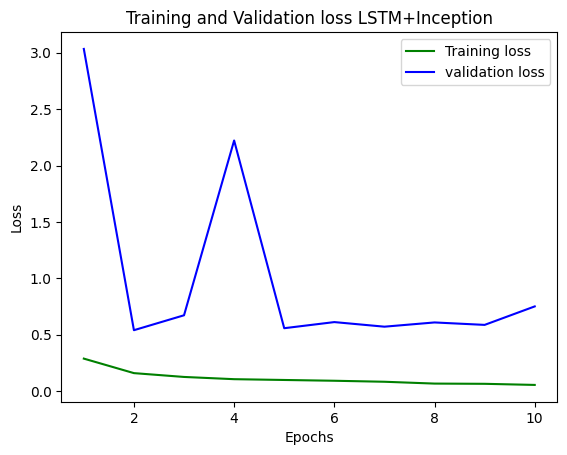

In [ ]:
loss_train = history_2.history['loss']
loss_val = history_2.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss LSTM+Inception')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("/content/drive/MyDrive/Graphs/Plots/"+"train_val_loss_inception.png")
plt.show()

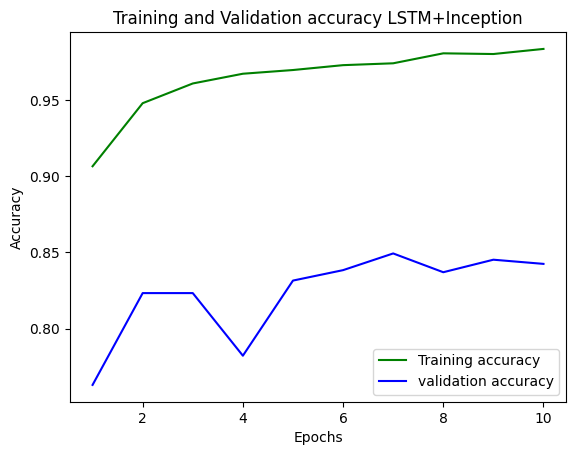

In [ ]:
acc_train = history_2.history['accuracy']
acc_val = history_2.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy LSTM+Inception')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("/content/drive/MyDrive/Graphs/Plots/"+"train_val_accuracy_inception.png")
plt.show()

In [ ]:
model_2.load_weights(folder_path + 'Models_incpetion_1/inception_lstm_att.h5')
y_pred = np.argmax(model_2.predict([test_image,test_pad_sequences]), axis=-1)
print_metrices(y_test, y_pred)

57/57 [==============================] - 4s 78ms/step
Precision:  0.667
Recall:  0.817
F1:  0.735


#LSTM+VGG16

In [ ]:

def create_lstm_vgg_model():
  keras.backend.clear_session()
  # create the base pre-trained model
  vgg = keras.applications.VGG16(weights='imagenet', include_top=False,input_shape=(256, 256, 3))
# for layer in inception.layers[0:-10]:
#     layer.trainable = False
  # add a global spatial average pooling layer
  x = vgg.output
 # pool = GlobalAveragePooling2D()(x)
  # this is the model we will train
  flat = Flatten()(x)
  # and a logistic layer -- let's say we have 200 classes
  hidden2 = Dense(200, activation='relu')(flat)
  # this is the model we will train
  vgg_img_model = Model(inputs=vgg.input, outputs=hidden2)

   # Text Model

  bi_text_inputs = Input(shape=(200,))
  bi_embedding_layer = Embedding(vocab_size,300, trainable=False)(bi_text_inputs)
  LSTM_Layer_1 = Bidirectional(LSTM(30))(bi_embedding_layer)
 # LSTM_Layer_2 = Bidirectional(LSTM(30))(LSTM_Layer_1)

  bi_dense_layer_1 = Dense(200, activation='relu')(LSTM_Layer_1)
  bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)


   # Concatenating the output of 2 classifiers
  con_layer = keras.layers.concatenate([vgg_img_model.output, bilstm_model.output])
  dropout = Dropout(0.2)(con_layer)
  out = Dense(1,activation='sigmoid')(dropout)

  #Defining model input and output
  com_model = Model(inputs = [vgg_img_model.input, bilstm_model.input], outputs=out)


      # Concatenating the output of 2 classifiers
  con_layer = keras.layers.concatenate([vgg_img_model.output, bilstm_model.output])
  dropout = Dropout(0.2)(con_layer)
  final_dense = Dense(64, activation="relu")(dropout)
  out = Dense(1,activation='sigmoid')(final_dense)

  #Defining model input and output
  com_model = Model(inputs = [vgg_img_model.input, bilstm_model.input], outputs=out)

  return com_model




In [ ]:
filepath = '/content/drive/MyDrive/Graphs/Weights/'+ 'Models_VGG_1/'+ 'vgg_lstm_att.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2,
                                             save_weights_only=True, mode='max' )


In [ ]:
model_3 = create_lstm_vgg_model()
model_3.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 256, 256, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)         0         ['block1_conv2[0][0]']        
                           

In [ ]:
model_3.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=["accuracy"])

In [ ]:
history_3 = model_3.fit([train_image, train_pad_sequences],
          y_train, batch_size=8, epochs=10, validation_split=0.1, callbacks=[checkpoint])

Epoch 1/10
822/822 [==============================] - ETA: 0s - loss: 9.3911 - accuracy: 0.9286
Epoch 1: saving model to /content/drive/MyDrive/Graphs/Weights/Models_VGG_1/vgg_lstm_att.h5
822/822 [==============================] - 75s 66ms/step - loss: 9.3911 - accuracy: 0.9286 - val_loss: 0.5157 - val_accuracy: 0.8260
Epoch 2/10
821/822 [============================>.] - ETA: 0s - loss: 0.1397 - accuracy: 0.9537
Epoch 2: saving model to /content/drive/MyDrive/Graphs/Weights/Models_VGG_1/vgg_lstm_att.h5
822/822 [==============================] - 52s 63ms/step - loss: 0.1397 - accuracy: 0.9537 - val_loss: 0.5042 - val_accuracy: 0.8288
Epoch 3/10
821/822 [============================>.] - ETA: 0s - loss: 0.1078 - accuracy: 0.9642
Epoch 3: saving model to /content/drive/MyDrive/Graphs/Weights/Models_VGG_1/vgg_lstm_att.h5
822/822 [==============================] - 52s 63ms/step - loss: 0.1078 - accuracy: 0.9642 - val_loss: 0.8162 - val_accuracy: 0.8137
Epoch 4/10
821/822 [=================

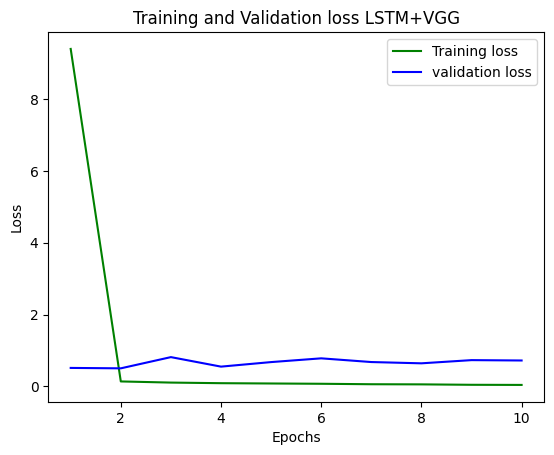

In [ ]:
loss_train = history_3.history['loss']
loss_val = history_3.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss LSTM+VGG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("/content/drive/MyDrive/Graphs/Plots/"+"train_val_loss_VGG.png")
plt.show()

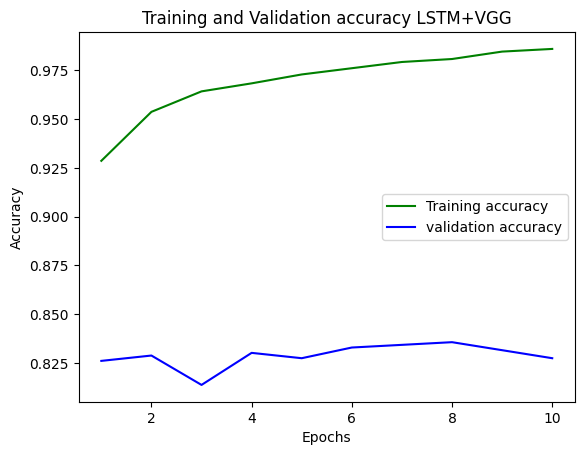

In [ ]:
acc_train = history_3.history['accuracy']
acc_val = history_3.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy LSTM+VGG')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("/content/drive/MyDrive/Graphs/Plots/"+"train_val_accuracy_VGG.png")
plt.show()

In [ ]:
model_3.load_weights(folder_path+'Models_VGG_1/'+'vgg_lstm_att.h5')
y_pred = np.argmax(model_3.predict([test_image,test_pad_sequences]), axis=-1)
print_metrices(y_test, y_pred)

57/57 [==============================] - 8s 137ms/step
Precision:  0.667
Recall:  0.8
F1:  0.7
